##Mounting google drive to read data


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore") 

##Reading the dataset

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Datasets/haberman.csv')

###Basic analysis to look how the data looks

In [4]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.shape

(306, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


###Mapping 0 to not-survived and 1 to survived

In [8]:
df['status'] = df['status'].map({2:0,1:1})

###Adding new column to store 'age' in bins for better visualization and analysis

In [9]:
df['age_category'] = pd.cut(df['age'],bins = [30,45,60,75,90],labels=['30-45','45-60','60-75','75-90'],include_lowest=True)


In [10]:
df.head()

,age,year,nodes,status,age_category
0,30,64,1,1,30-45
1,30,62,3,1,30-45
2,30,65,0,1,30-45
3,31,59,2,1,30-45
4,31,65,4,1,30-45


Checking how the target variable is distributed

In [11]:
df['status'].value_counts()

1    225
0     81
Name: status, dtype: int64

In [12]:
df['status'].value_counts(normalize=True)

1    0.735294
0    0.264706
Name: status, dtype: float64

In [ ]:
# df.groupby('age_category')['age'].count()

##Univariate Analysis

##Age category Column

Text(0, 0.5, 'Count')

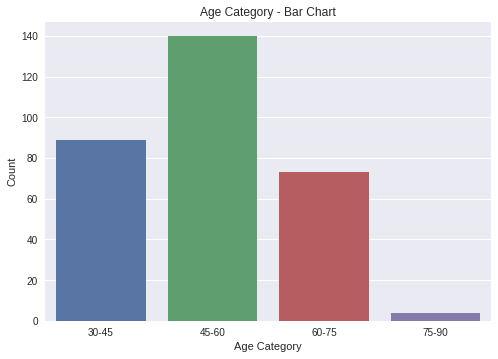

In [14]:
sns.barplot(x = df['age_category'].value_counts().index,y = df['age_category'].value_counts())
plt.title('Age Category - Bar Chart')
plt.xlabel('Age Category')
plt.ylabel('Count')

From the plot it can be seen that people aged between 45-60 constitute the larger portiion of the data followed by 30-45 and then 60-75. People of age in 75-90 constitute very small portion of the data.

Text(0.5, 1.0, 'Countplot - Age_category Vs Status')

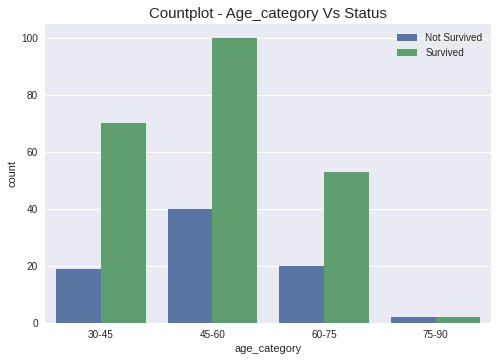

In [65]:
sns.countplot(data=df,x=df['age_category'],hue='status')
plt.legend(labels=["Not Survived","Survived"])
plt.title('Countplot - Age_category Vs Status',fontsize=15)

From the above plot, it can bee seen that the number of survivors are almost double the number who have succumbed to the disease. Although, in the age group between 75-90 the count of both kind of people seems to be same.

##Distribution plot

Text(0.5, 0.98, 'Distribution chart')

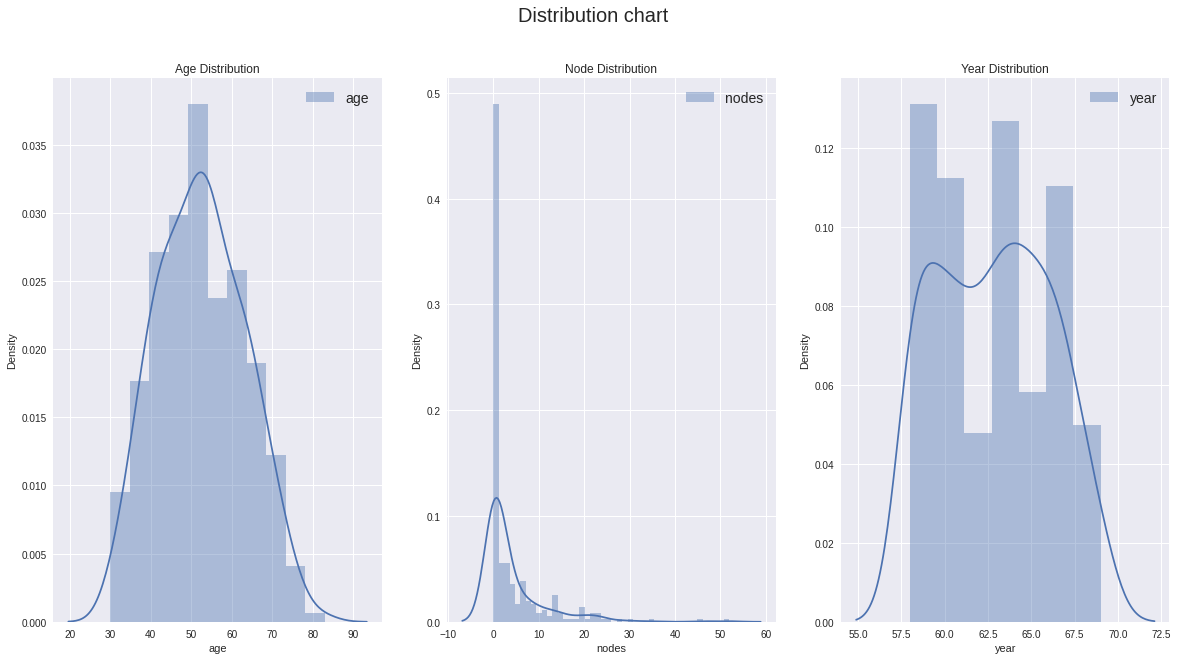

In [28]:
fig,ax = plt.subplots(1,3,figsize=(20,10))
sns.distplot(df['age'],ax=ax[0],label='age')
ax[0].legend(fontsize = 14)
ax[0].title.set_text('Age Distribution')
sns.distplot(df['nodes'],ax=ax[1],label='nodes')
ax[1].legend(fontsize = 14)
ax[1].title.set_text('Node Distribution')
sns.distplot(df['year'],ax=ax[2],label='year')
ax[2].legend(fontsize = 14)
ax[2].title.set_text('Year Distribution')
plt.suptitle('Distribution chart',fontsize=20)

It can be seen that age is almost normally distributed. The nodes column have a long tail towards the right and can be interpreted as a skewed distribution. The year column is kind of normal distribution with two peaks where lots of data might be collected.

##Box-plot b/w Status and age,nodes

In [84]:
df['status_text'] = df['status'].map({0:'Not-Survived',1:'Survived'})

Text(0.5, 0.98, 'Box plot for Age,Nodes Vs Status')

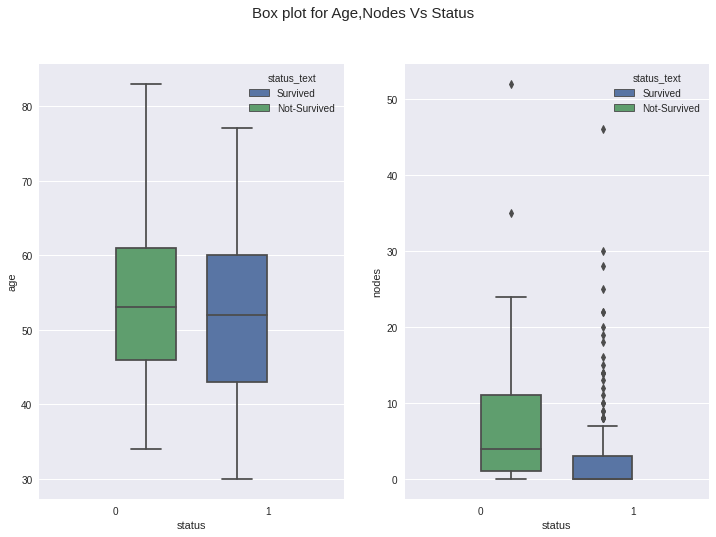

In [85]:
g = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x='status',y='age', data=df,hue='status_text')
# plt.legend(['not-survived','survived'])
plt.subplot(1,2,2)
sns.boxplot(x='status',y='nodes', data=df,hue='status_text')
plt.suptitle('Box plot for Age,Nodes Vs Status',fontsize=15)


##Violin plot

Text(0.5, 0.98, 'Violin plot for Age,Nodes Vs Status')

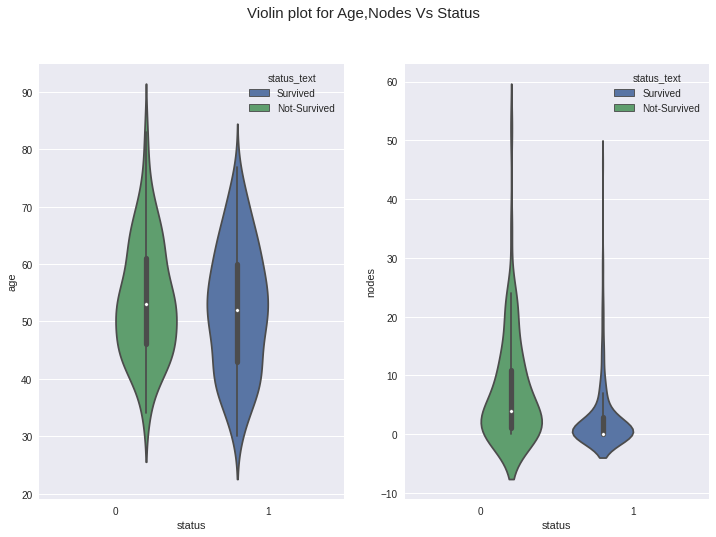

In [86]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(data=df,y='age', x= 'status',hue='status_text')

plt.subplot(1,2,2)
sns.violinplot(data=df,y='nodes', x= 'status',hue='status_text')

plt.suptitle('Violin plot for Age,Nodes Vs Status',fontsize=15)


From the box plot and the violin plots, it's evident that nodes is a better feature than age for classification as the median,25th and 75th percentile values almost overlap in age category.

#Count plot of Survivors/Non-Survivors

Text(0.5, 1.0, 'Counplot Nodes vs Status')

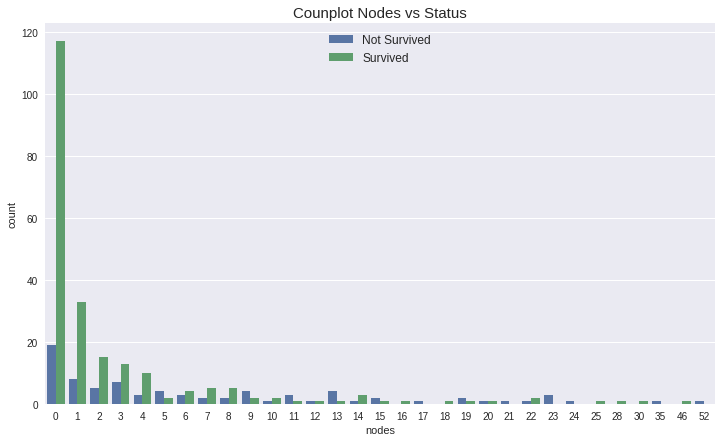

In [56]:
plt.figure(figsize=(12,7))
sns.countplot(data = df,x = df['nodes'],hue='status')
plt.legend(['Not Survived','Survived'],loc='upper center',fontsize = 'large')
plt.title('Counplot Nodes vs Status',fontsize =15)

Almost 120 people have survives with 0 nodes and 20 people have succumbed to the disease. Also, it can be seen that if the nodes are 5 or mode, the probability of survival seems to be be almost half and nothing can be concluded.

#Year vs Survivors

In [61]:
year_survival = df.groupby('year')['status'].sum()
year_survival

year
58    24
59    18
60    24
61    23
62    16
63    22
64    23
65    15
66    22
67    21
68    10
69     7
Name: status, dtype: int64

Text(0.5, 1.0, 'Countplot of Year vs No.of Data points')

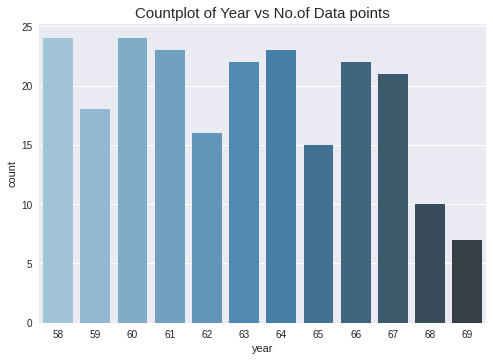

In [63]:
sns.barplot(y = year_survival.values,x = year_survival.index,palette="Blues_d")
plt.ylabel('count')
plt.title('Countplot of Year vs No.of Data points',fontsize=15)

In the year 1968,1969 the survival rates have been low. The above plot displays how many people have survived in a given year.

#Year vs Age-category survivors

Text(0.5, 1.0, 'Countplot - Year Vs Age_category Vs Status')

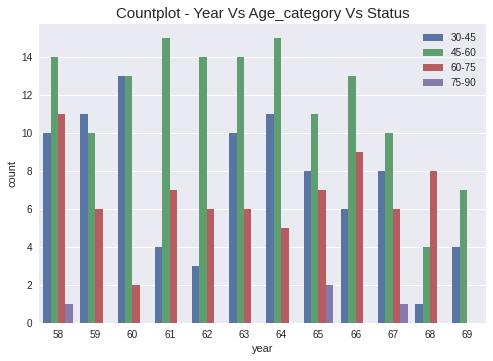

In [66]:
sns.countplot(x = 'year',data=df,hue='age_category')
plt.legend(loc='upper right')
plt.title('Countplot - Year Vs Age_category Vs Status',fontsize=15)

The above countplot displays how many people in each age category have survived in a given year. It's more of a microscopic view of the previous chart.

#Age category vs nodes

In [ ]:
# sns.violinplot(data=df,y='nodes', x= 'age_category',hue='status')

Text(0.5, 1.0, 'Age Category Vs Nodes')

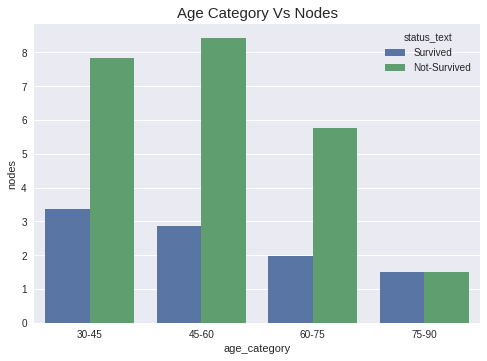

In [87]:
sns.barplot(data=df,y='nodes', x= 'age_category',hue='status_text',ci=False)
# plt.legend(labels=["Not-Survived(Blue)","Survived(Green)"],fontsize='medium')
plt.title('Age Category Vs Nodes',fontsize = 15)


The above plot shows the relationship between the age category and the number of nodes corresponding to an age category. Also, we can see the count of the patients who have survived or not with the difference in colour of the bar chart. 

#Relationship b/w numerical features and status(Survived/Not-survived)

https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions

https://stackoverflow.com/questions/37815774/seaborn-pairplot-legend-how-to-control-position

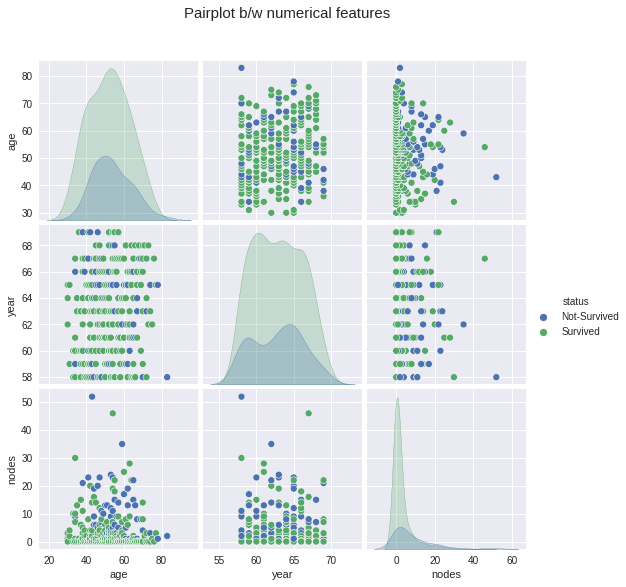

In [91]:
g = sns.pairplot(data = df,hue='status')
plt.suptitle('Pairplot b/w numerical features',fontsize=15, y=1.08)
# plt.legend(['Survived','Not-Survived'])
# g._legend.set_text(["Not Survived",'Survived'])
leg  = g._legend
new_labels = ['Not-Survived', 'Survived']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
g._legend.set_bbox_to_anchor((1.08, 0.5))

The above graph shows the relationship between the different features and also the unvariate distributions along the diagonal. We've also added a hue on the status of the patient, survived or not. We can find a dense cluster where the survivors had 0 nodes distributed among different ages.

#Heatmap for correlation b/w features

Text(0.5, 1.0, 'Heatmap - Correlation b/w features')

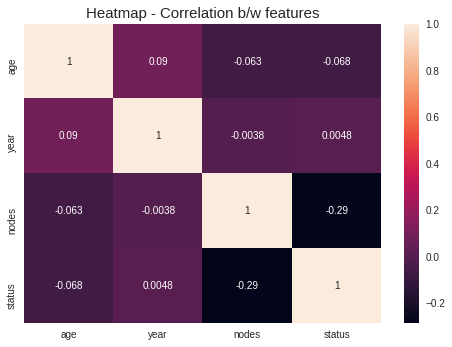

In [67]:
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap - Correlation b/w features',fontsize=15)

The heatmap above shos the correlation between the different features. It can be seens that the nodes are the highest correlated with status with a value of -0.29. 

#Final Conclusion

* As we analyzed the data, it can be seen that the data is imbalanced and the ratio b/w the classes is Survived = 0.735294, Not-survived =0.264706
* We've plotted the bar graph based on the age category a person belongs to and the number of people survived/not in that particular age category
* From the box plot and the violin plots, it's evident that nodes is a better feature than age for classification as the median,25th and 75th percentile values do not overlap.
* Almost 120 people have survives with 0 nodes and 20 people have succumbed to the disease. Also, it can be seen that if the nodes are 5 or mode, the probability of survival seems to be be almost half and nothing can be concluded.
* It can be seen that age is almost normally distributed. The nodes column have a long tail towards the right and can be interpreted as a skewed distribution. The year column is kind of normal distribution with two peaks where lots of data might be collected.
* The Age_category Vs nodes shows the relationship between the age category and the number of nodes corresponding to an age category. Also, it can be seen that the higher the number of nodes, the higher the chances that people succumb to the illness.
* Also, we've plotted the heatmap for the correlations between the variables and it can be seen that only the field 'node' has some negative correlation -0.29 with the dependent variable, meaning higher the number of nodes, lower the chance of survival
